In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv_path = 'data/Manaus.csv'
df = pd.read_csv(csv_path,encoding='iso-8859-1',sep=';')

/home/yonekura/anaconda3/envs/paic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,15,22,24,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df[df._classificacao.eq('Confirmado')]
print("Casos confirmados antes do Filtro: ", len(df.index)) # confirmados antes do filtro

filterList = ['_comorb', 'sintoma(s)*','_etnia','_profiss_saude','^(_dt_(\w){1,10})$','_origem', '_raca', '_criterio','_srag','_evolução','_tipo_teste']
for i in range(len(filterList)):
    df = df[df.columns.drop(list(df.filter(regex=filterList[i])))]
    
df_sem_conclusao = df[df.columns.drop('_conclusao')].copy()
df.dropna(inplace=True)
#df_sem_conclusao.dropna(inplace=True)
print("Casos confirmados depois do Filtro: ", len(df.index)) # confirmados antes do filtro
plt.rcParams.update({'font.size': 14})

Casos confirmados antes do Filtro:  36947
Casos confirmados depois do Filtro:  12672


In [4]:
bairros = df['_bairro_mapa'].value_counts()[:10]
bairros.loc['OUTROS'] =  df['_bairro_mapa'].value_counts()[10:].sum()
bairros = pd.DataFrame({'bairro':bairros.index, 'casos':bairros.values})
print(bairros)

                   bairro  casos
0             CIDADE NOVA    859
1                COMPENSA    520
2                ALVORADA    514
3                  FLORES    480
4       SÃO JOSÉ OPERÁRIO    479
5   PARQUE 10 DE NOVEMBRO    451
6          JORGE TEIXEIRA    448
7             NOVO ALEIXO    445
8                  CENTRO    412
9              PETRÓPOLIS    405
10                 OUTROS   7659


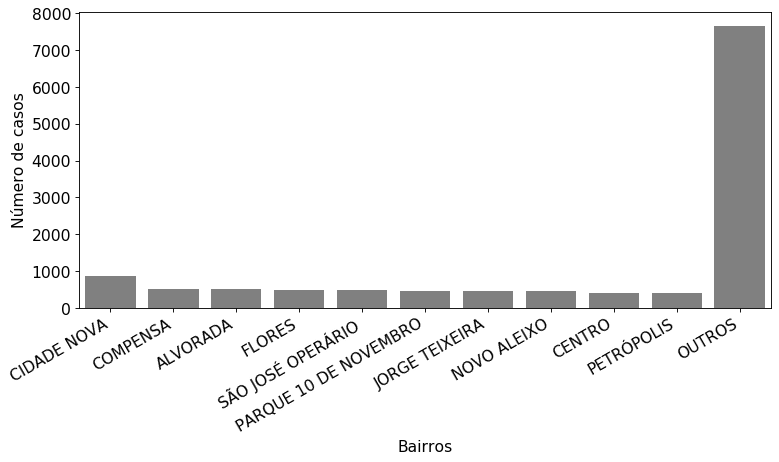

In [5]:
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x='bairro',y='casos',data=bairros,color='grey')

plt.xticks(rotation=30,ha='right')
ax.set_xlabel('Bairros')
ax.set_ylabel('Número de casos')
plt.tight_layout()
plt.savefig('top10_bairros.png')

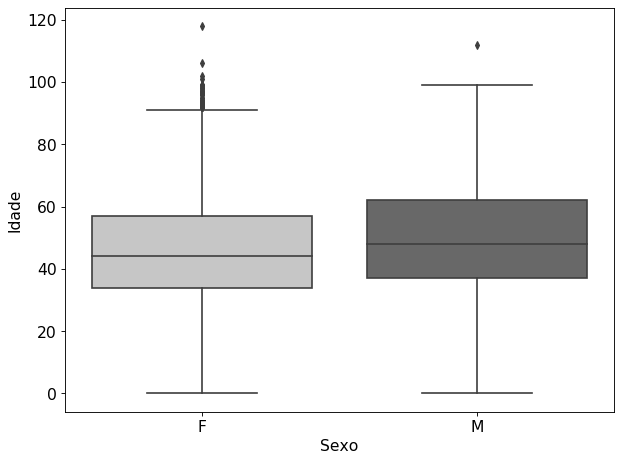

In [6]:
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.boxplot(x='_sexo', y='_idade',data=df,palette='Greys')
ax.set_xlabel('Sexo')
ax.set_ylabel('Idade')
plt.tight_layout()
plt.savefig('boxplot_idade.png')

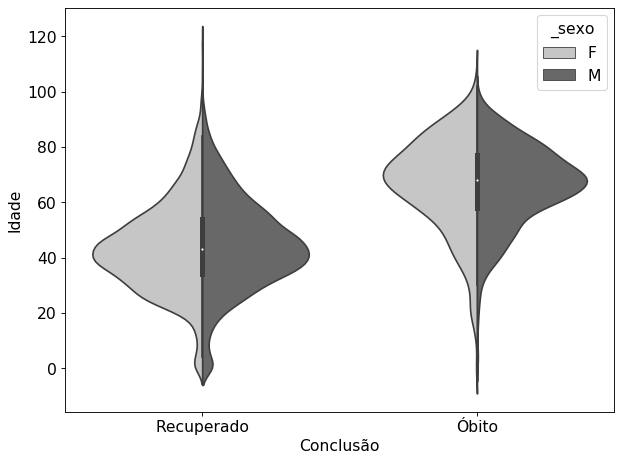

In [7]:

fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.violinplot(x='_conclusao', y='_idade',hue='_sexo',data=df,palette='Greys',split=True)
ax.set_xlabel('Conclusão')
ax.set_ylabel('Idade')
plt.tight_layout()
plt.savefig('boxplot_idade_sexo.png')

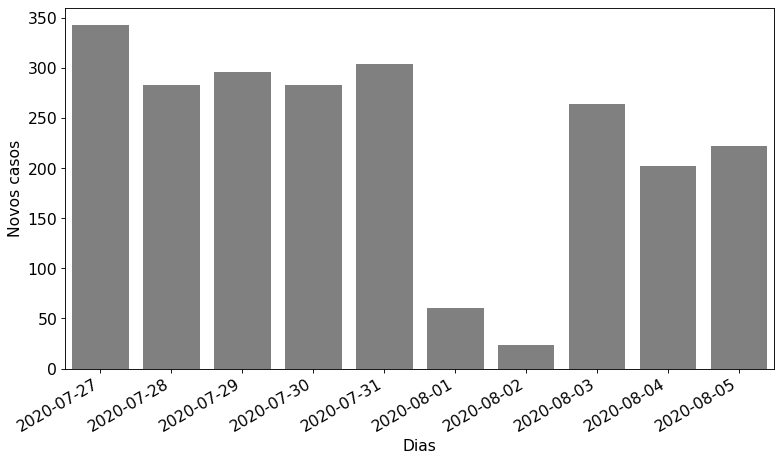

In [8]:
df_sem_conclusao['_dt_notificacao'] = pd.to_datetime(df_sem_conclusao['_dt_notificacao'],format='%d/%m/%Y')
n_dias = 10
casos = []
dti = pd.date_range(df_sem_conclusao["_dt_notificacao"].max() - pd.Timedelta(days=n_dias), periods=n_dias, freq='D')
for i in dti:
    aux = df_sem_conclusao['_dt_notificacao'] == i
    casos.append(len(df_sem_conclusao[aux]))
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x=dti,y=casos,color='grey')
ax.set_xlabel('Dias')
ax.set_ylabel('Novos casos')
dates = dti.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=dates, rotation=30, ha='right')
plt.tight_layout()
plt.savefig('casos_10_dias.png')

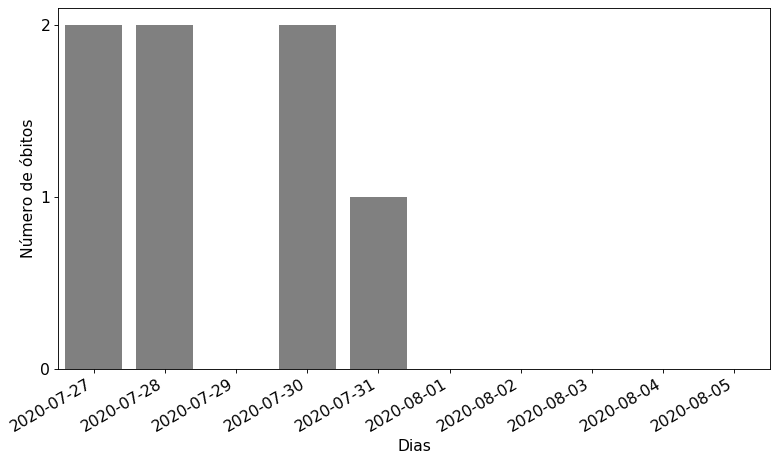

In [9]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'],format='%d/%m/%Y')
n_dias = 10
casos = []
dti = pd.date_range(df_sem_conclusao["_dt_notificacao"].max() - pd.Timedelta(days=n_dias), periods=n_dias, freq='D')
for i in dti:
    aux = df[df._conclusao.eq('Óbito') & (df['_dt_notificacao']==i)]
    casos.append(len(aux))
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x=dti,y=casos,color='grey')
plt.xticks(rotation=45,ha='right')
ax.set_xlabel('Dias')
ax.set_ylabel('Número de óbitos')
dates = dti.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=dates, rotation=30, ha='right')
plt.yticks([0,1,2])
plt.tight_layout()
plt.savefig('obitos_10_dias.png')

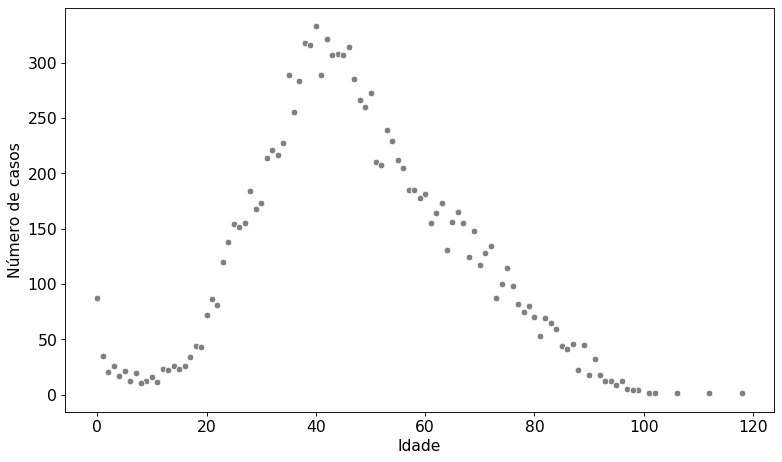

In [10]:
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
groupedByAge = df.loc[:]
groupedByAge = groupedByAge['_idade'].value_counts().reset_index()
groupedByAge.columns = ['idade', 'quantidade']
groupedByAge
ax = sns.scatterplot(x='idade', y='quantidade',data=groupedByAge,color='grey')
ax.set_xlabel('Idade')
ax.set_ylabel('Número de casos')
plt.tight_layout()
plt.savefig('scatterplot_idade.png')

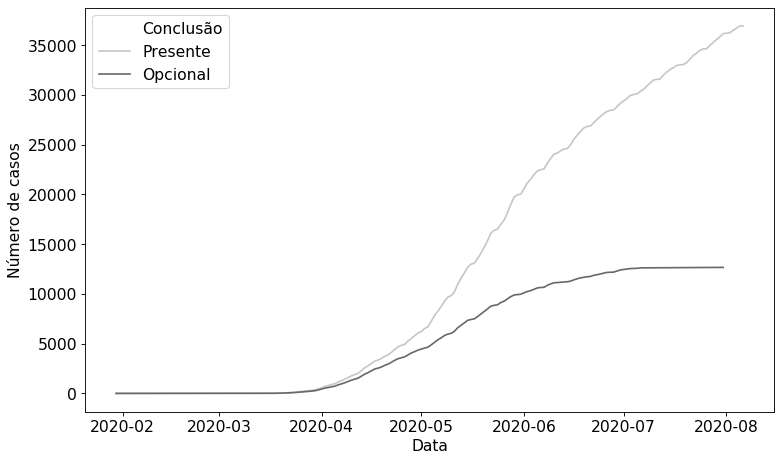

In [16]:
df_sem_conclusao['_dt_notificacao'] = pd.to_datetime(df_sem_conclusao['_dt_notificacao'],format='%d/%m/%Y')
casos_por_dia = df_sem_conclusao['_dt_notificacao'].value_counts().reset_index().sort_values('index')
casos_por_dia.columns = ['date', 'count']
casos_cumulativos = casos_por_dia.copy()
casos_cumulativos['count'] = np.cumsum(casos_cumulativos['count']) 
casos_cumulativos['Conclusão'] = 'Presente'

fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')

df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'],format='%d/%m/%Y')
casos_por_dia = df['_dt_notificacao'].value_counts().reset_index().sort_values('index')
casos_por_dia.columns = ['date', 'count']
casos_cumulativos2 = casos_por_dia.copy()
casos_cumulativos2['count'] = np.cumsum(casos_cumulativos2['count']) 
casos_cumulativos2['Conclusão'] = 'Opcional'
casos_cumulativos = casos_cumulativos.append(casos_cumulativos2)

ax = sns.lineplot(x='date',y='count',hue='Conclusão',data=casos_cumulativos,palette='Greys')

ax.set_xlabel('Data')
ax.set_ylabel('Número de casos')
plt.tight_layout()
plt.savefig('lineplot_cumulativo.png')

['0a-10a', '10a-20a', '20a-30a', '30a-40a', '40a-50a', '50a-60a', '60a-70a', '70a-80a', '80a-90a', '90a-100a', '100a-110a', '110a-120a']


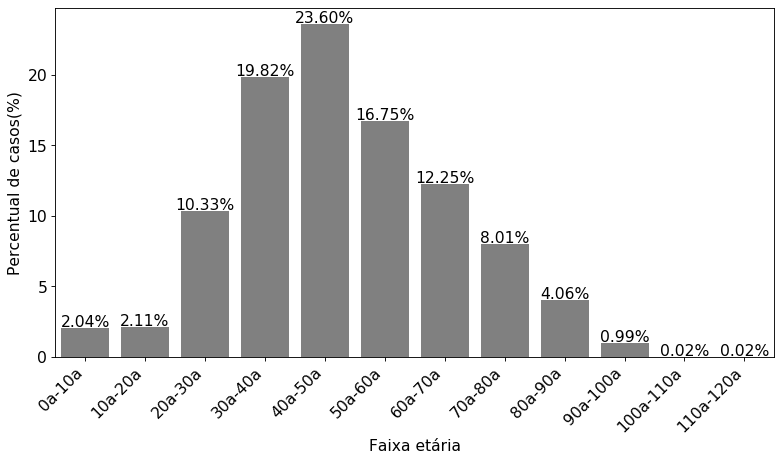

In [12]:
bins = np.zeros((12),dtype=np.int32)
for i in groupedByAge.iterrows():
    index = int(i[1][0]//10)
    bins[index] += i[1][1]
    
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(np.arange(12),bins/np.sum(bins)*100,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.1,
            '{:2.2f}%'.format(height),
            ha="center") 
faixas = [F'{i*10}a-{(i+1)*10}a' for i in range(12)]
print(faixas)
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Percentual de casos(%)')
ax.set_xticklabels(labels=faixas, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('barplot_faixa.png')